In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Data/constant_dollar_expenditures_no_taxes_tips.csv")

In [3]:
df = df.set_index("Year")

In [4]:
years = list(df.index.values)

In [5]:
df = df.replace(",", "", regex = True)

In [6]:
df_fah = df.iloc[:, 0:9]
df_fafh = df.iloc[:, 9:19]

In [7]:
columns_fah = []
columns_fafh = []

for category in df_fah.columns:
    index = category.find("sales")
    sliced_category = category[:index - 1]
    columns_fah.append(sliced_category)
    
for category in df_fafh.columns:
    index = category.find("sales")
    sliced_category = category[:index - 1]
    columns_fafh.append(sliced_category)
    
df_fah.columns = columns_fah
df_fafh.columns = columns_fafh

In [8]:
data_fah = {}
data_fafh = {}

for category in df_fah.columns:
    data_fah[category] = {}
    for year in years:
        sales = float(df_fah.at[year, category])
        total = float(df_fah.at[year, "Total food at home"])
        data_fah[category][year] = round(sales / total * 100)

for category in df_fafh.columns:
    data_fafh[category] = {}
    for year in years:
        sales = float(df_fafh.at[year, category])
        total = float(df_fafh.at[year, "Total food away from home"])
        data_fafh[category][year] = round(sales / total * 100)

In [9]:
df_fah_final = pd.DataFrame(data_fah)
df_fafh_final = pd.DataFrame(data_fafh)

df_fah_without_total = df_fah_final.iloc[:, 0:8]
df_fafh_without_total = df_fafh_final.iloc[:, 0:9]

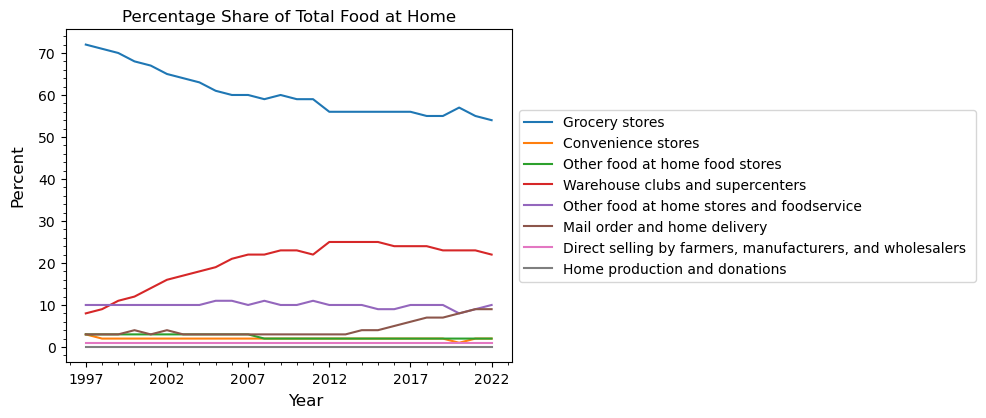

In [17]:
fig, ax1 = plt.subplots()
ax1.set_title("Percentage Share of Total Food at Home")
ax1.plot(df_fah_without_total, label = df_fah_without_total.columns)
pos = ax1.get_position()
ax1.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height * 0.9])
ax1.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
ax1.locator_params(integer = True)
ax1.minorticks_on()
ax1.xaxis.set_ticks(range(1997, 2023, 5))
fig.text(0.5, 0.03, "Year", ha = "center", va = "center", fontsize = 12)
fig.text(0.05, 0.5, "Percent", ha = "center", va = "center", rotation = "vertical", fontsize = 12)
plt.show()

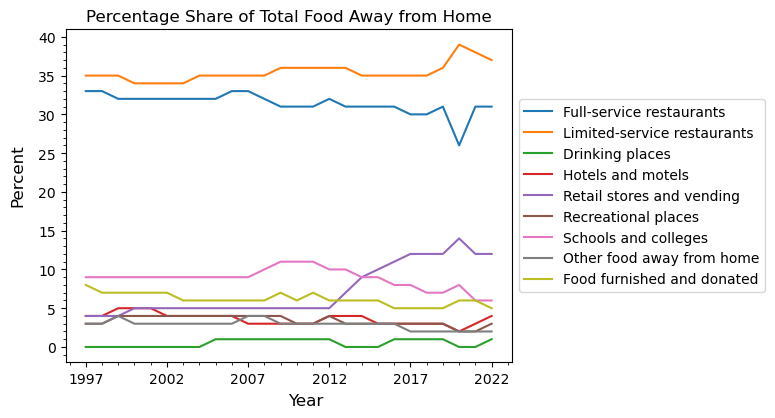

In [22]:
fig, ax2 = plt.subplots()
ax2.set_title("Percentage Share of Total Food Away from Home")
ax2.plot(df_fafh_without_total, label = df_fafh_without_total.columns)
pos = ax2.get_position()
ax2.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height * 0.9])
ax2.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
ax2.locator_params(integer = True)
ax2.minorticks_on()
ax2.xaxis.set_ticks(range(1997, 2023, 5))
fig.text(0.5, 0.03, "Year", ha = "center", va = "center", fontsize = 12)
fig.text(0.05, 0.5, "Percent", ha = "center", va = "center", rotation = "vertical", fontsize = 12)
plt.show()

In [23]:
percent_change_fah = {}

for category in df_fah_without_total.columns:
    if category != "Home production and donations":
        percent_past = df_fah_without_total.at[1997, category] 
        percent_present = df_fah_without_total.at[2022, category]
        percent_change_fah[category] = round((percent_present - percent_past) / percent_past * 100)
    else:
        percent_change_fah[category] = 0
        
percent_change_fafh = {}

for category in df_fafh_without_total.columns:
    if category != "Drinking places":
        percent_past = df_fafh_without_total.at[1997, category] 
        percent_present = df_fafh_without_total.at[2022, category]
        percent_change_fafh[category] = round((percent_present - percent_past) / percent_past * 100)
    else:
        percent_change_fafh[category] = 100

In [24]:
percent_change_fah = sorted(percent_change_fah.items(), key = lambda x: x[1])
percent_change_fafh = sorted(percent_change_fafh.items(), key = lambda x: x[1])

percent_change_fah = dict(percent_change_fah)
percent_change_fafh = dict(percent_change_fafh)

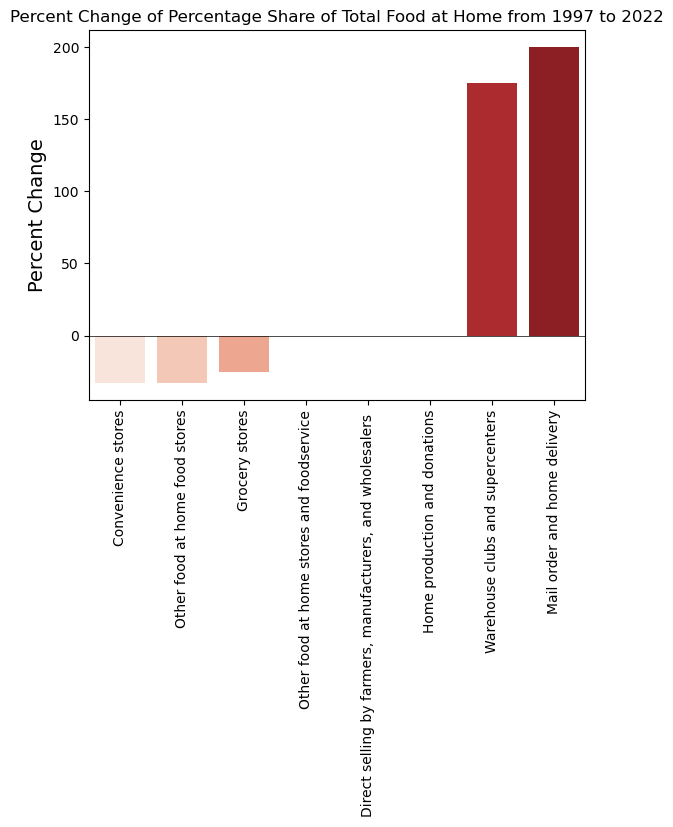

In [25]:
fig, ax1 = plt.subplots()
ax1.set_title("Percent Change of Percentage Share of Total Food at Home from 1997 to 2022")
groups_fah = list(percent_change_fah.keys())
values_fah = list(percent_change_fah.values())
sns.barplot(ax = ax1, x = groups_fah, y = values_fah, dodge = False, palette = "Reds")
ax1.set_xticklabels(groups_fah, rotation = 90)
ax1.set_ylabel("Percent Change", fontsize = 14)
ax1.axhline(y = 0, color = "Black", linewidth = 0.5)
plt.show()

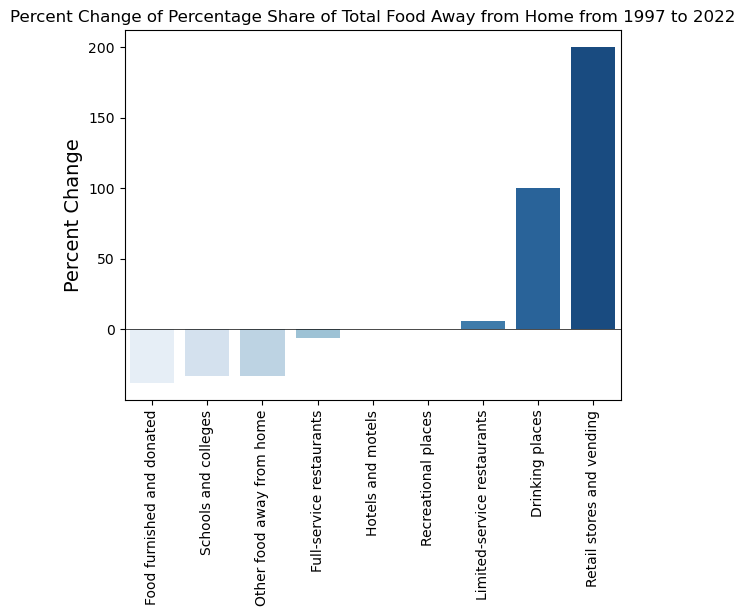

In [26]:
fig, ax1 = plt.subplots()
ax1.set_title("Percent Change of Percentage Share of Total Food Away from Home from 1997 to 2022")
groups_fafh = list(percent_change_fafh.keys())
values_fafh = list(percent_change_fafh.values())
sns.barplot(ax = ax1, x = groups_fafh, y = values_fafh, dodge = False, palette = "Blues")
ax1.set_xticklabels(groups_fafh, rotation = 90)
ax1.set_ylabel("Percent Change", fontsize = 14)
ax1.axhline(y = 0, color = "Black", linewidth = 0.5)
plt.show()

In [27]:
df_fafh_without_1997 = df_fafh_without_total.loc[1997]
df_fafh_without_2022 = df_fafh_without_total.loc[2022]

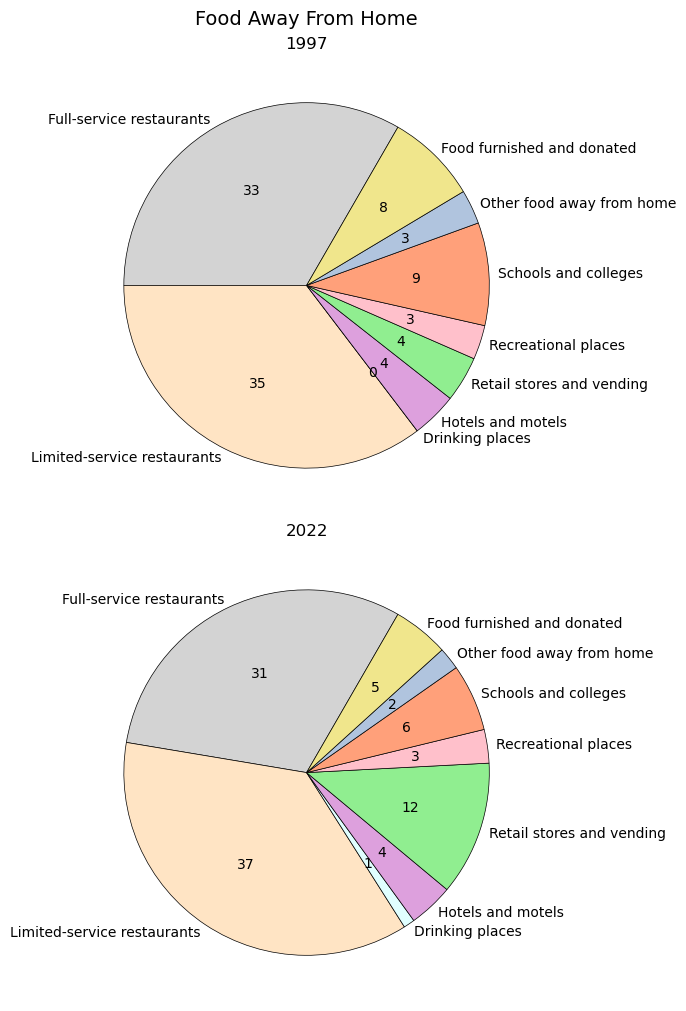

In [28]:
colors = ["lightgray", "bisque", "lightcyan", "plum", "lightgreen", "pink", "lightsalmon", "lightsteelblue", "khaki"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,10), constrained_layout = True)
ax1.set_title("1997")
ax1.pie(df_fafh_without_1997.values, labels = df_fafh_without_1997.index, autopct = "%.0f",
      labeldistance = 1.05, startangle = 60, colors = colors, wedgeprops = {"edgecolor" : "black",
                                                                           "linewidth" : 0.5,
                                                                           "antialiased" : True})
ax2.set_title("2022")
ax2.pie(df_fafh_without_2022.values, labels = df_fafh_without_2022.index, autopct = "%.0f",
      labeldistance = 1.05, startangle = 60, colors = colors, wedgeprops = {"edgecolor" : "black",
                                                                           "linewidth" : 0.5,
                                                                           "antialiased" : True})
fig.suptitle("Food Away From Home", fontsize = 14)
plt.show()

In [29]:
df_fah_without_1997 = df_fah_without_total.loc[1997]
df_fah_without_1997_swap = df_fah_without_1997.reindex(index = ['Grocery stores', 'Convenience stores',
       'Other food at home food stores', 'Warehouse clubs and supercenters',
       'Home production and donations',
       'Other food at home stores and foodservice',
       'Mail order and home delivery',
       'Direct selling by farmers, manufacturers, and wholesalers '])
df_fah_without_2022 = df_fah_without_total.loc[2022]
df_fah_without_2022_swap = df_fah_without_2022.reindex(index = ['Grocery stores', 'Convenience stores',
       'Other food at home food stores', 'Warehouse clubs and supercenters',
       'Home production and donations',
       'Other food at home stores and foodservice',
       'Mail order and home delivery',
       'Direct selling by farmers, manufacturers, and wholesalers '])

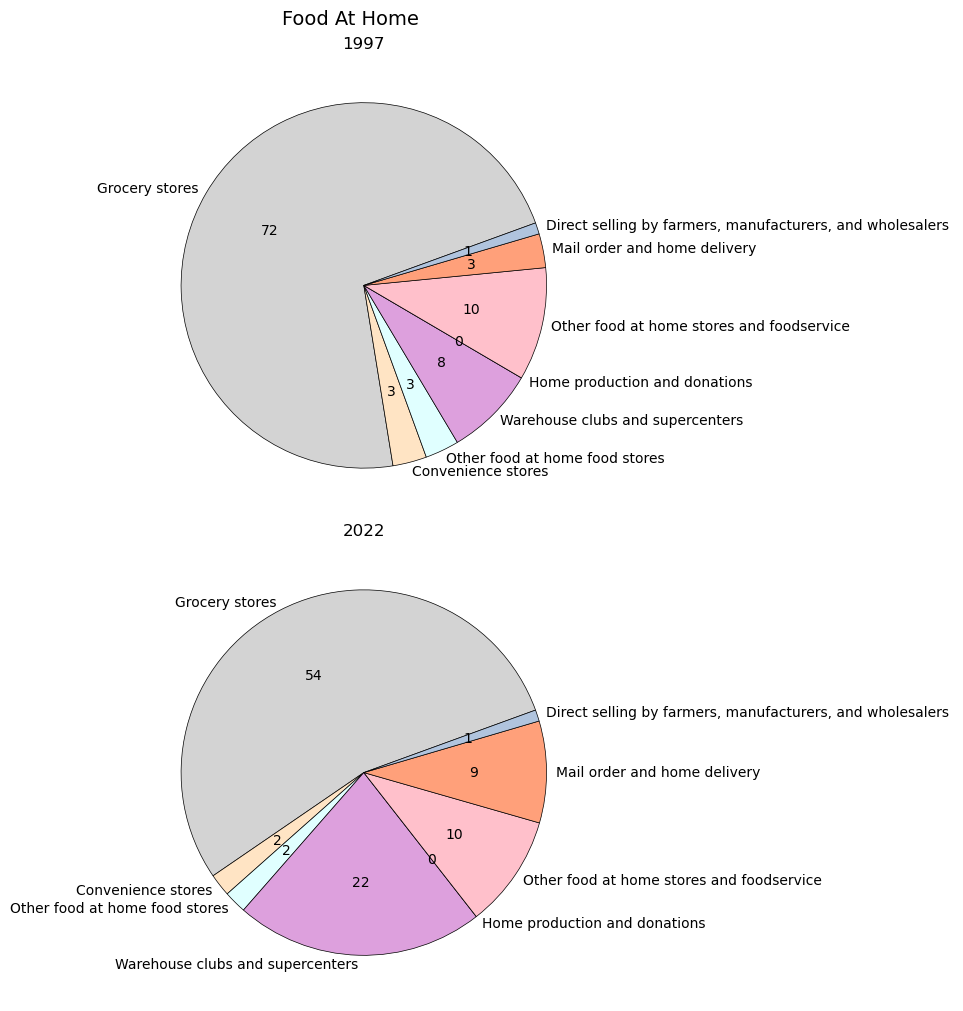

In [30]:
colors = ["lightgray", "bisque", "lightcyan", "plum", "lightgreen", "pink", "lightsalmon", "lightsteelblue", "khaki"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,10), constrained_layout = True)
ax1.set_title("1997")
ax1.pie(df_fah_without_1997_swap.values, labels = df_fah_without_1997_swap.index, autopct = "%.0f",
      labeldistance = 1.05, startangle = 20, colors = colors, wedgeprops = {"edgecolor" : "black",
                                                                           "linewidth" : 0.5,
                                                                           "antialiased" : True})
ax2.set_title("2022")
ax2.pie(df_fah_without_2022_swap.values, labels = df_fah_without_2022_swap.index, autopct = "%.0f",
      labeldistance = 1.05, startangle = 20, colors = colors, wedgeprops = {"edgecolor" : "black",
                                                                           "linewidth" : 0.5,
                                                                           "antialiased" : True})
fig.suptitle("Food At Home", fontsize = 14, x = 0.4)
plt.show()